In [ ]:
from collections import defaultdict
import numpy as np
import networkx as nx

def clique_random_sequential(graph : nx.Graph) -> list:
    graph = graph.copy()
    clique_list = []
    while len(graph.nodes())>0:
        clique = []
        node_list = list(graph.nodes())
        np.random.permutation(node_list)
        for node in node_list:
            flag = True
            for exist_node in clique:
                if node not in graph[exist_node]:
                    flag =False
                    break
            if flag:
                clique.append(node)
        graph.remove_nodes_from(clique)
        clique_list.append(clique)
    return clique_list


Enter vertices: 1 2 3 4 5 6
Enter edges: 1 3 1 5 1 6 2 5 2 6 3 4 3 5 5 6
V:  [1, 2, 3, 4, 5, 6]
E:  [(1, 3), (1, 5), (1, 6), (2, 5), (2, 6), (3, 4), (3, 5), (5, 6)]
----------------------------
Partition:  [[1, 3, 5], [2, 6], [4]]
The clique cover number is:  3


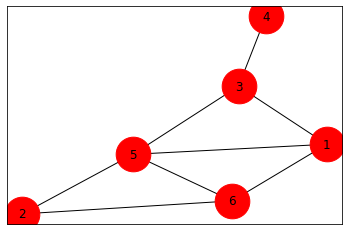

In [ ]:
import networkx.drawing.nx_pylab as vis
GX = nx.Graph()
V = []
E = []

vertices = input("Enter vertices: ").split(" ")
i = 0
while (i < len(vertices)):
  V.append(int(vertices[i]))
  i += 1

edges = input("Enter edges: ").split(" ")
i = 0
while (i < len(edges)): 
  E.append((int(edges[i]), int(edges[i+1])))
  i += 2
print ("V: ", V)
print ("E: " , E)

GX.add_nodes_from(V)
GX.add_edges_from(E)
print ("----------------------------")
nodes =  clique_random_sequential(GX)
print ("Partition: ", nodes)
print("The clique cover number is: ", len(nodes))

vis.draw_networkx(GX, with_labels=True, node_size=1200, node_color="#FF0000" )


In [ ]:
#Random Graph Generation
import networkx.generators.random_graphs as randomG
G = randomG.fast_gnp_random_graph(5,0.5, seed = None, directed = False)
print(G.nodes())
print(G.edges())

[0, 1, 2, 3, 4]
[(0, 1), (0, 4), (2, 3), (2, 4), (3, 4)]


In [ ]:
#Another Random Graph Generation
G = randomG.gnm_random_graph(1000,1000,seed = None, directed = False )
print (len(G.nodes()))
print (len(G.edges()))

1000
1000


In [ ]:
#a case
import time 

G1000 = randomG.fast_gnp_random_graph(2000,0.9, seed = None, directed = False)
x = time.perf_counter()
nodes =  clique_random_sequential(G1000)
y = time.perf_counter()
print(y-x, " V: " , len(G1000.nodes()), " E: ", len(G1000.edges()))

#print ("Partition: ", nodes)
print("The clique cover number is: ", len(nodes))



10.271835350000174  V:  2000  E:  1799469
The clique cover number is:  53


In [ ]:
#another case
import time 

GV3E5 = randomG.gnm_random_graph(2000,1800000,seed = None, directed = False )
x = time.perf_counter()
nodes =  clique_random_sequential(GV3E5)
y = time.perf_counter()
print(y-x, " V: " , len(GV3E5.nodes()), " E: ", len(GV3E5.edges()))

#print ("Partition: ", nodes)
print("The clique cover number is: ", len(nodes))



10.214323913000044  V:  2000  E:  1800000
The clique cover number is:  51


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from os.path import join
import matplotlib.image as mpimg
from shapely import wkt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Performance for
                
               E = 100, V = 100...200...1000

               V = 100, E = 100...200...1000
                       
              
Iterations: Done: 100, Undone :300, 500, 1000
               

In [ ]:
#Runtime Table
table_x_100 = {'Size(V)': [], 'MeanTime(ms)': [], 'Standard Deviation': []
     , 'Standard Error': [],  '%90-CL': [], '%95-CL': []}
df_x_100 = pd.DataFrame(data=table_x_100)

df_x_100.head()

,Size(V),MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL


In [ ]:
import networkx.generators.random_graphs as randomG
import time

tval90 = 1.645
tval95 = 1.96
iteration = 100
edge_size = 100

vertex_sizes = [100,200,300,500,700,1000]
i = 1
for vertex_size in vertex_sizes:
  flag = True
  time_list = []
  for num in range(iteration):
    p1 = time.perf_counter() 
    G = randomG.gnm_random_graph(vertex_size,edge_size,seed = None, directed = False)
    start = time.perf_counter()
    clique_random_sequential(G)
    end = time.perf_counter()
    if (flag):
      print("Time for ", vertex_size, " is ", end-start)
      flag = False
    time_list.append(end-start)

  std = np.std(time_list)
  mean = np.mean(time_list)
  stderr = std / np.sqrt(iteration)

  uppermean90 = mean + (stderr * tval90)
  lowermean90 = mean - (stderr * tval90)
  CL90 = str(lowermean90)[0:8] + "-" + str(uppermean90)[0:8]

  uppermean95 = mean + (stderr * tval95)
  lowermean95 = mean - (stderr * tval95)
  CL95 = str(lowermean95)[0:8] + "-" + str(uppermean95)[0:8]

  df_x_100.loc[i] = pd.Series(data = (int(vertex_size), mean, std, stderr, CL90, CL95), index = table_x_100, name = i)
  p2 = time.perf_counter() 
  print("For vertex: ", vertex_size, ": ",i, " is DONE!, total time: ", (p2-p1)*100)
  i += 1
  
df_x_100.head(6)

Time for  100  is  0.0076720569995814
For vertex:  100 :  1  is DONE!, total time:  1.089871200019843
Time for  200  is  0.027302178999889293
For vertex:  200 :  2  is DONE!, total time:  2.9351868000958348
Time for  300  is  0.061981549000847735
For vertex:  300 :  3  is DONE!, total time:  6.849552699895867
Time for  500  is  0.1982044849992235
For vertex:  500 :  4  is DONE!, total time:  18.738745900009235
Time for  700  is  0.39414220199978445
For vertex:  700 :  5  is DONE!, total time:  41.99098480003158
Time for  1000  is  0.9001527399996121
For vertex:  1000 :  6  is DONE!, total time:  82.76692030012782


,Size(V),MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL
1,100.0,0.006900,0.000883,0.000088,0.006755-0.007045,0.006727-0.007073
2,200.0,0.028533,0.002335,0.000234,0.028149-0.028917,0.028075-0.028991
3,300.0,0.065714,0.002932,0.000293,0.065231-0.066196,0.065139-0.066288
4,500.0,0.195000,0.007943,0.000794,0.193693-0.196306,0.193443-0.196557
5,700.0,0.402624,0.013087,0.001309,0.400470-0.404776,0.400058-0.405188
6,1000.0,0.842317,0.020355,0.002035,0.838968-0.845665,0.838327-0.846306


V = 100

In [ ]:
#Runtime Table
table_100_x = {'Size(E)': [], 'MeanTime(ms)': [], 'Standard Deviation': []
     , 'Standard Error': [],  '%90-CL': [], '%95-CL': []}
df_100_x = pd.DataFrame(data=table_100_x)

df_100_x.head()

,Size(E),MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL


In [ ]:
iteration = 100
vertex_size = 100

edge_sizes = [100,500,1000,2000,3000,4000]
i = 1
for edge_size in edge_sizes:
  flag = True
  time_list = []
  for num in range(iteration):
    p1 = time.perf_counter()
    G = randomG.gnm_random_graph(vertex_size,edge_size,seed = None, directed = False)
    start = time.perf_counter()
    clique_random_sequential(G)
    end = time.perf_counter()
    if (flag):
      print("Time for ", edge_size, " is ", end-start)
      flag = False
    time_list.append(end-start)

  std = np.std(time_list)
  mean = np.mean(time_list)
  stderr = std / np.sqrt(iteration)

  uppermean90 = mean + (stderr * tval90)
  lowermean90 = mean - (stderr * tval90)
  CL90 = str(lowermean90)[0:8] + "-" + str(uppermean90)[0:8]

  uppermean95 = mean + (stderr * tval95)
  lowermean95 = mean - (stderr * tval95)
  CL95 = str(lowermean95)[0:8] + "-" + str(uppermean95)[0:8]

  df_100_x.loc[i] = pd.Series(data = (edge_size, mean, std, stderr, CL90, CL95), index = table_100_x, name = i)
  p2 = time.perf_counter() 
  print("For edge ", edge_size, ": ",i, " is DONE!, total time: ", (p2-p1)*100)
  i += 1
  
df_100_x.head(6)

Time for  100  is  0.006615479000174673
For edge  100 :  1  is DONE!, total time:  1.2685031000728486
Time for  500  is  0.007867330999943078
For edge  500 :  2  is DONE!, total time:  1.177546400049323
Time for  1000  is  0.008422412000072654
For edge  1000 :  3  is DONE!, total time:  1.1285483999927237
Time for  2000  is  0.010206455999650643
For edge  2000 :  4  is DONE!, total time:  1.6764466000495304
Time for  3000  is  0.011877053000716842
For edge  3000 :  5  is DONE!, total time:  2.598089299954154
Time for  4000  is  0.014840980000371928
For edge  4000 :  6  is DONE!, total time:  3.3379297999999835


,Size(E),MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL
1,100.0,0.009352,0.000646,0.000065,0.009245-0.009458,0.009225-0.009478
2,500.0,0.007972,0.000530,0.000053,0.007885-0.008059,0.007868-0.008076
3,1000.0,0.007461,0.001255,0.000125,0.007254-0.007667,0.007214-0.007706
4,2000.0,0.008903,0.000959,0.000096,0.008744-0.009060,0.008714-0.009090
5,3000.0,0.011357,0.001144,0.000114,0.011168-0.011545,0.011132-0.011581
6,4000.0,0.014115,0.001374,0.000137,0.013888-0.014340,0.013845-0.014384


V = 100, 300, 500, 1000
density = 0.1, 0.25, 0.5, 0.75, 1

In [ ]:
#Runtime Table
table_v_p = {'Size(V)': [], 'Density': [], 'MeanTime(ms)': [], 'Standard Deviation': []
     , 'Standard Error': [],  '%90-CL': [], '%95-CL': []}
df_v_p = pd.DataFrame(data=table_v_p)

df_v_p.head()

,Size(V),Density,MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL


In [ ]:
iteration = 100
vertex_sizes = [100, 300, 500, 1000]
densities = [0.1, 0.25, 0.5, 0.75, 1]

i = 1
for vertex_size in vertex_sizes:
  for density in densities:
    flag = True
    time_list = []
    for num in range(iteration):
      p1 = time.perf_counter()
      G = randomG.fast_gnp_random_graph(vertex_size,density, seed = None, directed = False)
      start = time.perf_counter()
      clique_random_sequential(G)
      end = time.perf_counter()
      if (flag):
        print("Time for ", density, " is ", end-start)
        flag = False
      time_list.append(end-start)

    std = np.std(time_list)
    mean = np.mean(time_list)
    stderr = std / np.sqrt(iteration)

    uppermean90 = mean + (stderr * tval90)
    lowermean90 = mean - (stderr * tval90)
    CL90 = str(lowermean90)[0:8] + "-" + str(uppermean90)[0:8]

    uppermean95 = mean + (stderr * tval95)
    lowermean95 = mean - (stderr * tval95)
    CL95 = str(lowermean95)[0:8] + "-" + str(uppermean95)[0:8]

    df_v_p.loc[i] = pd.Series(data = (vertex_size, density, mean, std, stderr, CL90, CL95), index = table_v_p, name = i)
    p2 = time.perf_counter() 
    print("For vertex ", vertex_size, " and density ", density , ": DONE!, total time: ", (p2-p1)*100)
    i += 1
  
df_v_p.head(20)

Time for  0.1  is  0.006758890000128304
For vertex  100  and density  0.1 : DONE!, total time:  1.5464195999811636
Time for  0.25  is  0.008594113999606634
For vertex  100  and density  0.25 : DONE!, total time:  1.4492301999780466
Time for  0.5  is  0.009732202999657602
For vertex  100  and density  0.5 : DONE!, total time:  1.8707025999901816
Time for  0.75  is  0.013873446999241423
For vertex  100  and density  0.75 : DONE!, total time:  2.4192615000174555
Time for  1  is  0.021797686000354588
For vertex  100  and density  1 : DONE!, total time:  3.403691399944364
Time for  0.1  is  0.045935878000818775
For vertex  300  and density  0.1 : DONE!, total time:  6.315077299950644
Time for  0.25  is  0.07888637799987919
For vertex  300  and density  0.25 : DONE!, total time:  9.827106400007324
Time for  0.5  is  0.10088732300027914
For vertex  300  and density  0.5 : DONE!, total time:  12.984384999981557
Time for  0.75  is  0.12873773999945115
For vertex  300  and density  0.75 : DONE!,

,Size(V),Density,MeanTime(ms),Standard Deviation,Standard Error,%90-CL,%95-CL
1,100.0,0.10,0.007680,0.000957,0.000096,0.007522-0.007837,0.007492-0.007867
2,100.0,0.25,0.007891,0.001110,0.000111,0.007708-0.008073,0.007673-0.008108
3,100.0,0.50,0.012865,0.026167,0.002617,0.008560-0.017169,0.007736-0.017993
4,100.0,0.75,0.013578,0.001129,0.000113,0.013392-0.013763,0.013356-0.013799
5,100.0,1.00,0.020857,0.002099,0.000210,0.020511-0.021202,0.020445-0.021268
6,300.0,0.10,0.050860,0.026051,0.002605,0.046574-0.055145,0.045754-0.055966
7,300.0,0.25,0.075518,0.043077,0.004308,0.068431-0.082604,0.067074-0.083960
8,300.0,0.50,0.096702,0.029007,0.002901,0.091930-0.101474,0.091016-0.102387
9,300.0,0.75,0.121385,0.002960,0.000296,0.120898-0.121872,0.120804-0.121965
10,300.0,1.00,0.194599,0.005395,0.000540,0.193711-0.195486,0.193541-0.195656


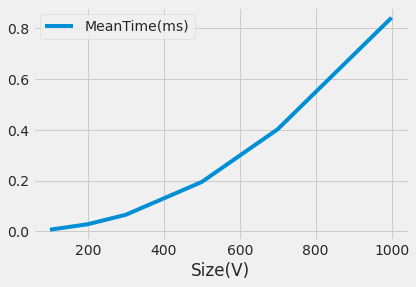

In [ ]:
constant_edge = df_x_100.copy()

constant_edge.plot.line(x = "Size(V)", y = "MeanTime(ms)")

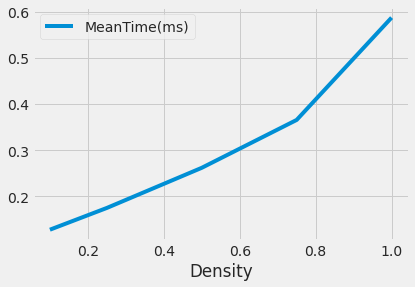

In [ ]:
vertex_density = df_v_p.copy()
vertex_density = vertex_density[vertex_density["Size(V)"] == 500]

vertex_density.plot.line(x = "Density", y = "MeanTime(ms)")